In [1]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('glucose_insulin.csv', index_col='time')

In [2]:
df

,glucose,insulin
time,,
0,92,11
2,350,26
4,287,130
6,251,85
8,240,51
10,216,49
12,211,45
14,205,41
16,196,35


In [3]:
tn = np.linspace(0,182,183)
df_ins = df.reindex(index = tn, columns=['insulin'])
df_glu = df.reindex(index = tn, columns=['glucose'])


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


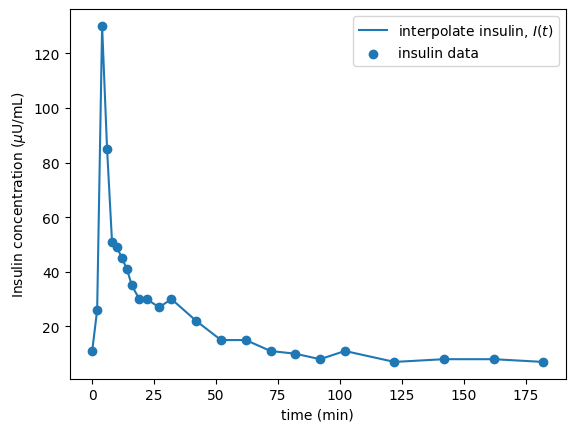

In [4]:

df_ins_interp = df_ins.interpolate(method='linear')
insulin_interp = df_ins_interp['insulin'].values

plt.plot(tn, insulin_interp, label = 'interpolate insulin, $I(t)$')
plt.scatter(tn, df_ins.values, label = 'insulin data')
plt.xlabel('time (min)')
plt.ylabel('Insulin concentration ($\mu$U/mL)')
plt.legend()
plt.savefig('insulin.eps', format='eps') 

In [5]:
def Runge_Kutta(f, t0, y0s, dt, It):
  n = len(y0s)
  k1s = [dt*fs[i](t0, y0s, It)           for i in range(n)]
  yts = [y0s[i] + 0.5*k1s[i]       for i in range(n)]
  k2s = [dt*fs[i](t0 + 0.5*dt, yts, It)  for i in range(n)]
  yts = [y0s[i] + 0.5*k2s[i]       for i in range(n)]
  k3s = [dt*fs[i](t0 + 0.5*dt, yts, It)  for i in range(n)]
  yts = [y0s[i] + k3s[i]           for i in range(n)]
  k4s = [dt*fs[i](t0 + dt, yts, It)      for i in range(n)]
  return [y0s[i] + (k1s[i] + 2*k2s[i] + 2*k3s[i] + k4s[i])/6 for i in range(n)]

def sys_ode(fs, t0, y0s, dt, tn, It):
  t=[]
  y1s=[]
  y2s=[]
  for i in range(int((tn-t0)/dt)):
    y0s = Runge_Kutta(fs, t0, y0s, dt, It[i])
    y1s.append(y0s[0])
    y2s.append(y0s[1])
    t.append(t0)
    t0 = t0 + dt
  return t, y1s, y2s
 

In [6]:
if __name__ == '__main__':

    k1 = 0.03
    k2 = 0.02
    k3 = 0.00001
    Gb = 92
    Ib = 11

    fs = [
    lambda t, ys, It: -k1*(ys[0]-Gb) - ys[0]*ys[1],
    lambda t, ys, It:  k3*(It - Ib)  - k2*ys[1]
    ]
    
    It = insulin_interp
    t, y1, y2 = sys_ode(fs, 0, [290, 0], 1, 183, It)
    
    
    # ys[0] : G(t)
    # ys[1] : X(t)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


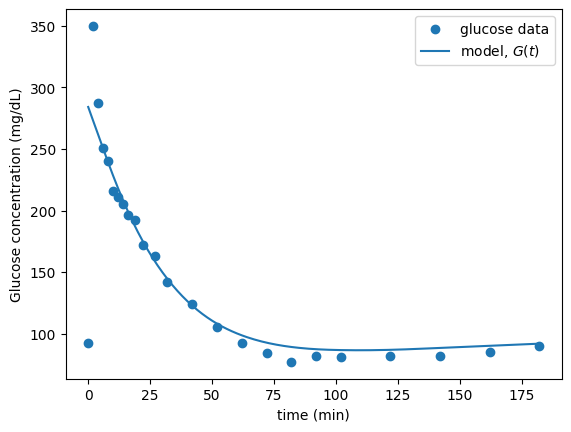

In [7]:
glucose_data = df_glu.values
plt.scatter(tn, glucose_data, label='glucose data')
plt.plot(tn, y1, label='model, $G(t)$')
plt.xlabel('time (min)')
plt.ylabel('Glucose concentration (mg/dL)')
plt.legend()
plt.savefig('glucose.eps', format='eps') 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


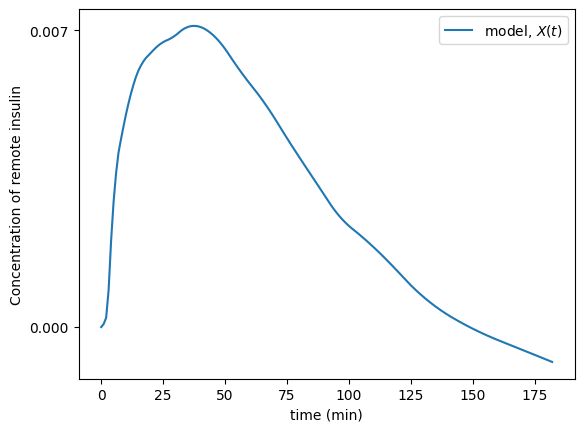

In [8]:
remote_insulin = y2
plt.plot(tn, remote_insulin, label='model, $X(t)$')
plt.xlabel('time (min)')
plt.ylabel('Concentration of remote insulin')
plt.yticks([0,7e-3])
plt.legend()
plt.savefig('remote_insulin.eps', format='eps') 